In [ ]:
first_run = False

if 'google.colab' in str(get_ipython()):
  print("Running in colab...")
  
  !pip install h2o

  from google.colab import drive
  drive.mount('/content/drive')

  train_all_features = '/content/drive/MyDrive/Repasse Gui/dataset_anonymized/train-val_stratified_2C.csv'
  validation_dataset_path = '/content/drive/MyDrive/Repasse Gui/dataset_anonymized/test_stratified_regions.csv'
  path_models = "/content/drive/MyDrive/Repasse Gui/models_H2O"
else:
  if first_run:
    !pip install h2o
    !pip install pandas
    !pip install sklearn
    !pip install matplotlib
  
  print("Running locally...")
  
  train_all_features = f"../dataset_anonymized/train-val_stratified.csv"
  validation_dataset_path = f"../dataset_anonymized/test_stratified.csv"
  path_models = f"../models_H2O"

Running in colab...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.2 MB 43 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 sha256=c35109c4518e4df6ea430e86104dc9e8a0ff7c2d34ec1be568247fac3a63f46e
  Stored in directory: /root/.cache/pip/wheels/a1/a1/d9/bb37df368c4635a707e7362d1088450b606041f05aeba5f173
Successfully built h2o
Mounted at /content/drive


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_hsv_1ql
  JVM stdout: /tmp/tmp_hsv_1ql/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_hsv_1ql/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_8xg2sa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### List of indexes for selected features from model selections

In [ ]:
df = h2o.import_file(train_all_features, header=0)
df = df.drop([0])
df["city_enc"] = df["city_enc"].asfactor()
df["ia level"] = df["ia level"].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
feat_dict = dict()
idx = 0
for feat in df.columns:
    feat_dict.update({idx:feat})
    idx += 1

feat_dict

{0: 'city',
 1: 'Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?',
 2: 'Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?',
 3: 'Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?',
 4: 'Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?',
 5: 'Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?',
 6: 'Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
 7: 'Você cria animais que são utilizados para consumo da sua família?',
 8: 'Você planta alimentos que são utilizados para consumo da sua família?',
 9: 'A senho

In [ ]:
def get_accuracy(model, test):
    preds = model.predict(test).as_data_frame(use_pandas=True)
    y_hat = preds["predict"]
    y = test["ia level"].as_data_frame(use_pandas=True)
    y = y["ia level"]

    hits = 0
    for prediction, target in zip(y_hat, y):
        if prediction == target:
            hits += 1

    return hits/len(y)

In [ ]:
best_accuracy = 0
best_model = None
best_feature_set = None

In [ ]:
response_col = 'ia level'

def apply_autoML_for(training):
    aml = H2OAutoML(max_runtime_secs=0, seed=42, nfolds=10, exclude_algos = ["StackedEnsemble"])
    display(training)
    aml.train(y=response_col, training_frame=training)

    return aml

###Execução All Features

In [ ]:
# Always include the 'ia level' column 29

sanity_check_features = [10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29]


In [ ]:
df_sanity_check_features = df[sanity_check_features]


In [ ]:
feature_combinations = {
    "sanity_check_features" : df[sanity_check_features]
}

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for sanity_check_features

"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level
0,0,0.825083,1,1,0,0,0,1,1,1,1,1,1,1,0,1,nao grave
0,0,0.412541,1,1,0,0,1,1,1,1,1,0,0,0,0,1,nao grave
0,0,0.457096,0,0,0,1,0,0,0,1,1,0,0,0,0,1,grave
1,0.166667,0.268977,1,1,0,1,0,1,1,1,1,1,1,0,0,1,nao grave
0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,nao grave
1,0.166667,0.907591,1,0,0,0,0,1,1,1,1,1,0,0,0,1,nao grave
0,0,0.455446,1,1,0,0,0,1,0,0,0,0,0,0,0,1,nao grave
0,0,0.412541,1,0,0,1,1,0,0,1,1,0,0,0,0,1,grave
1,0.166667,0.825083,1,1,0,0,0,1,1,1,1,1,0,0,0,1,nao grave
0,0,0.330033,1,1,0,0,0,0,1,1,1,0,0,0,0,1,nao grave


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%



### Best Model Updated: sanity_check_features-XGBoost_grid_1_AutoML_1_20220919_142705_model_6-acc:0.6802248677248677

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/sanity_check_features-XGBoost_grid_1_AutoML_1_20220919_142705_model_6-acc:0.6802248677248677

### sanity_check_features has accuracy: 0.6802248677248677

### Details of the best model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220919_142705_model_6


Model Summary: 


,,number_of_trees
0,,33.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.20408371029646108
RMSE: 0.4517562509766313
LogLoss: 0.5956528661988876
Mean Per-Class Error: 0.4663700664246764
AUC: 0.6628164388217204
AUCPR: 0.7874633598058085
Gini: 0.32563287764344073

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4744129911545784: 


,,grave,nao grave,Error,Rate
0,grave,819.0,8083.0,0.908,(8083.0/8902.0)
1,nao grave,453.0,17856.0,0.0247,(453.0/18309.0)
2,Total,1272.0,25939.0,0.3137,(8536.0/27211.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.474413,0.807087,338.0
1,max f2,0.321097,0.911713,391.0
2,max f0point5,0.594253,0.750204,256.0
3,max accuracy,0.544116,0.692330,296.0
4,max precision,0.885213,1.000000,0.0
5,max recall,0.282100,1.000000,397.0
6,max specificity,0.885213,1.000000,0.0
7,max absolute_mcc,0.639785,0.231005,217.0
8,max min_per_class_accuracy,0.679867,0.613682,176.0
9,max mean_per_class_accuracy,0.642776,0.615000,214.0



Gains/Lift Table: Avg response rate: 67.29 %, avg score: 67.34 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010069,0.852336,1.345182,1.345182,0.905109,0.863114,0.905109,0.863114,0.013545,0.013545,34.518184,34.518184,0.010625
1,2,0.020029,0.841679,1.305231,1.325317,0.878229,0.845576,0.891743,0.854394,0.012999,0.026544,30.523149,32.531662,0.019917
2,3,0.030098,0.833969,1.328909,1.326519,0.894161,0.836375,0.892552,0.848365,0.013381,0.039926,32.890948,32.651863,0.030040
3,4,0.040094,0.820970,1.300433,1.320015,0.875000,0.827006,0.888176,0.843040,0.012999,0.052925,30.043285,32.001511,0.039220
4,5,0.050164,0.815274,1.242124,1.304380,0.835766,0.818572,0.877656,0.838129,0.012508,0.065432,24.212355,30.437974,0.046672
5,6,0.103120,0.792774,1.235585,1.269051,0.831367,0.803120,0.853885,0.820150,0.065432,0.130865,23.558525,26.905085,0.084808
6,7,0.154202,0.776732,1.202867,1.247126,0.809353,0.784400,0.839133,0.808307,0.061445,0.192310,20.286697,24.712626,0.116484
7,8,0.200213,0.762407,1.182320,1.232233,0.795527,0.769531,0.829112,0.799396,0.054399,0.246709,18.231959,23.223310,0.142126
8,9,0.300136,0.735266,1.136384,1.200323,0.764619,0.747824,0.807641,0.782227,0.113551,0.360260,13.638413,20.032256,0.183783
9,10,0.401308,0.712156,1.081861,1.170458,0.727933,0.722888,0.787546,0.767267,0.109454,0.469714,8.186080,17.045761,0.209099




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.21053219103401352
RMSE: 0.45883787009576
LogLoss: 0.6105037834855956
Mean Per-Class Error: 0.4930145565603695
AUC: 0.6223903379660666
AUCPR: 0.7573274581450895
Gini: 0.24478067593213315

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3787964539868491: 


,,grave,nao grave,Error,Rate
0,grave,155.0,8747.0,0.9826,(8747.0/8902.0)
1,nao grave,63.0,18246.0,0.0034,(63.0/18309.0)
2,Total,218.0,26993.0,0.3238,(8810.0/27211.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378796,0.805527,372.0
1,max f2,0.298766,0.911558,390.0
2,max f0point5,0.604262,0.735883,240.0
3,max accuracy,0.497377,0.680497,319.0
4,max precision,0.837718,0.858951,18.0
5,max recall,0.254126,1.000000,397.0
6,max specificity,0.892543,0.999775,0.0
7,max absolute_mcc,0.618226,0.176179,228.0
8,max min_per_class_accuracy,0.683931,0.581627,165.0
9,max mean_per_class_accuracy,0.649472,0.586740,199.0



Gains/Lift Table: Avg response rate: 67.29 %, avg score: 67.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010033,0.850616,1.252117,1.252117,0.842491,0.860212,0.842491,0.860212,0.012562,0.012562,25.211745,25.211745,0.007732
1,2,0.020029,0.837460,1.294969,1.273504,0.871324,0.844455,0.856881,0.852348,0.012944,0.025507,29.496884,27.350383,0.016745
2,3,0.030025,0.827546,1.234865,1.260640,0.830882,0.832393,0.848225,0.845704,0.012344,0.037850,23.486480,26.063992,0.023921
3,4,0.040057,0.819985,1.235785,1.254415,0.831502,0.823300,0.844037,0.840093,0.012398,0.050249,23.578548,25.441491,0.031152
4,5,0.050127,0.812968,1.225851,1.248677,0.824818,0.816162,0.840176,0.835286,0.012344,0.062592,22.585119,24.867704,0.038103
5,6,0.100070,0.791691,1.147191,1.198027,0.771891,0.801547,0.806096,0.818447,0.057294,0.119886,14.719147,19.802743,0.060574
6,7,0.150013,0.775981,1.184374,1.193482,0.796909,0.783668,0.803038,0.806868,0.059151,0.179038,18.437403,19.348187,0.088721
7,8,0.200029,0.761744,1.148782,1.182305,0.772961,0.768595,0.795517,0.797298,0.057458,0.236496,14.878166,18.230476,0.111468
8,9,0.300026,0.735670,1.091307,1.151976,0.734289,0.748381,0.775110,0.780995,0.109127,0.345622,9.130670,15.197579,0.139377
9,10,0.400022,0.712894,1.050888,1.126706,0.707093,0.723681,0.758107,0.766667,0.105085,0.450707,5.088793,12.670615,0.154931




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.678990,0.007825,0.678913,0.683572,0.661889,0.682470,0.683205,0.671812,0.684307,0.675854,0.678060,0.689820
1,auc,0.622518,0.013815,0.604391,0.623809,0.616657,0.610777,0.619889,0.632310,0.631921,0.630442,0.606141,0.648846
2,err,0.321010,0.007825,0.321087,0.316428,0.338111,0.317530,0.316795,0.328188,0.315693,0.324146,0.321940,0.310180
3,err_count,873.500000,21.292930,874.000000,861.000000,920.000000,864.000000,862.000000,893.000000,859.000000,882.000000,876.000000,844.000000
4,f0point5,0.724583,0.007557,0.724932,0.728631,0.708233,0.728388,0.728321,0.716591,0.729815,0.721872,0.724306,0.734737
5,f1,0.806234,0.005914,0.806294,0.810644,0.793907,0.810858,0.806292,0.799100,0.811829,0.803913,0.807557,0.811943
6,f2,0.908659,0.004763,0.908228,0.913462,0.903160,0.914387,0.902960,0.903081,0.914610,0.906993,0.912431,0.907280
7,lift_top_group,1.245262,0.105264,1.244803,1.157514,1.363336,1.305271,1.222706,1.082167,1.152522,1.186421,1.320361,1.417516
8,logloss,0.610504,0.008135,0.616535,0.605809,0.624430,0.609455,0.611868,0.615454,0.600966,0.609668,0.614713,0.596136
9,max_per_class_error,0.966616,0.023817,0.967342,0.980549,0.969116,0.994240,0.927212,0.943784,0.989607,0.965479,0.992054,0.936782



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-09-19 14:33:41,2 min 11.857 sec,0.0,0.500000,0.693147,0.500000,0.672853,1.000000,0.327147
1,,2022-09-19 14:33:41,2 min 11.957 sec,5.0,0.462738,0.619201,0.615700,0.749039,1.213068,0.322627
2,,2022-09-19 14:33:41,2 min 12.093 sec,10.0,0.458432,0.609968,0.629571,0.762810,1.301113,0.320973
3,,2022-09-19 14:33:41,2 min 12.259 sec,15.0,0.455993,0.604704,0.641766,0.772128,1.319280,0.322039
4,,2022-09-19 14:33:41,2 min 12.462 sec,20.0,0.454435,0.601353,0.650144,0.778098,1.284781,0.320716
5,,2022-09-19 14:33:41,2 min 12.723 sec,25.0,0.453403,0.599136,0.654643,0.781534,1.349667,0.315093
6,,2022-09-19 14:33:42,2 min 13.032 sec,30.0,0.452358,0.596928,0.660167,0.785403,1.299203,0.315975
7,,2022-09-19 14:33:42,2 min 13.275 sec,33.0,0.451756,0.595653,0.662816,0.787463,1.345182,0.313697



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,"Ao todo, quanto as pessoas da família ganharam no mês passado (inc...",794.695374,1.000000,0.259374
1,O domicílio possui água canalizada em pelo menos um cômodo?,363.764984,0.457741,0.118726
2,A água utilizada para beber neste domicílio é:,344.281464,0.433224,0.112367
3,"No domicílio, existe banheiro ou sanitário?",251.683472,0.316704,0.082145
4,cras,159.594437,0.200825,0.052089
5,Qual é a forma de abastecimento de água utilizada no domicílio?,156.835571,0.197353,0.051188
6,O carro de lixo da Prefeitura busca o seu lixo quantas vezes por s...,153.314987,0.192923,0.050039
7,Você ou alguém no seu domicílio gostaria de fazer algum curso de q...,148.700424,0.187116,0.048533
8,Qual é o material predominante na construção das paredes externas ...,144.612503,0.181972,0.047199
9,O domicílio está localizado em área de conflito/violência?,136.717712,0.172038,0.044622


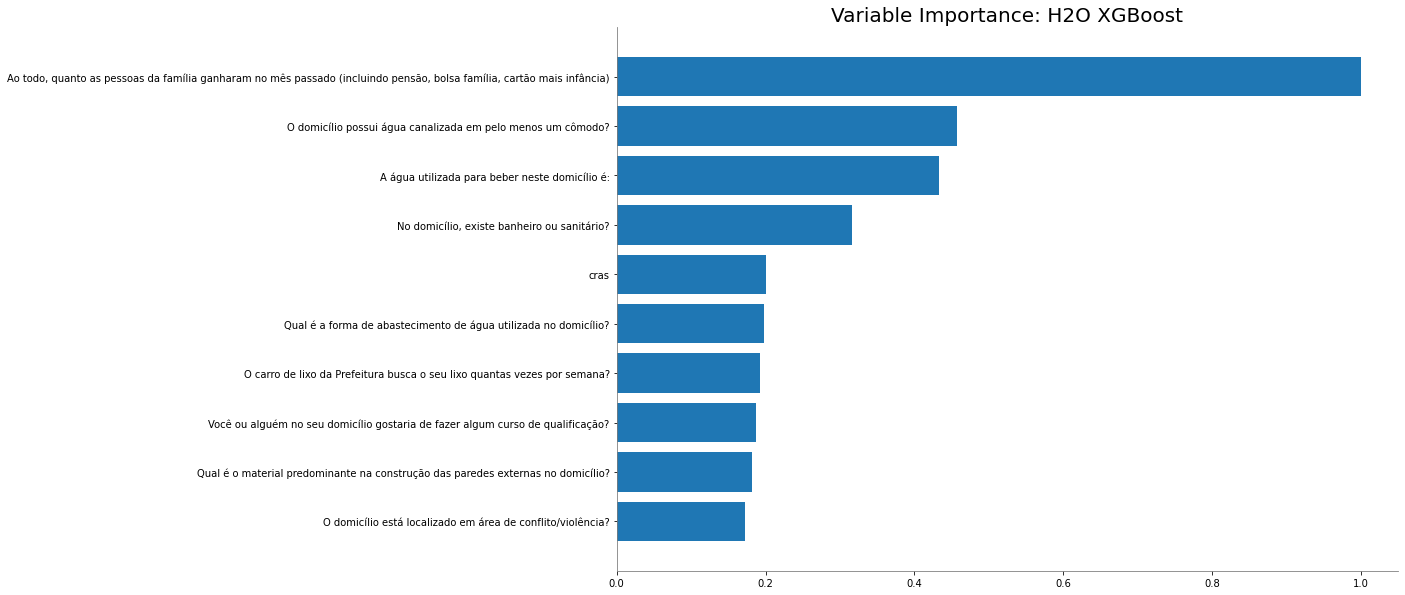

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# Execução best features from best model

In [ ]:
best_feature = [12, 15, 19, 14, 17, 21, 18, 23, 25, 27, 22, 10, 28, 11, 26, 16, 29]

In [ ]:
df_best_feature = df[best_feature]

In [ ]:
feature_combinations = {
    "df_best_feature" : df[best_feature]
}

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for df_best_feature

"Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",cras,Qual é a forma de abastecimento de água utilizada no domicílio?,Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,A casa onde a família mora é:,A água utilizada para beber neste domicílio é:,Qual é o material predominante na construção das paredes externas no domicílio?,O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?","No domicílio, existe banheiro ou sanitário?","Atualmente, alguém no seu domicílio tem algum trabalho remunerado?",O domicílio está localizado em área de conflito/violência?,"Se sim, quantos trabalham?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?",creas,ia level
0.412541,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,grave
0.412541,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,nao grave
0.325908,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,grave
0.412541,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,nao grave
0.412541,0,1,1,0,1,0,1,1,1,1,0,1,0,0,0,grave
0.412541,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,grave
0.313531,1,1,0,0,1,0,1,0,0,1,1,1,0.166667,0,0,nao grave
0.412541,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,nao grave
0.330033,1,1,1,0,1,0,0,0,1,1,1,1,0.166667,0,0,nao grave
0.577558,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,grave


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%



### Best Model Updated: df_best_feature-GBM_2_AutoML_1_20220929_03258-acc:0.6779100529100529

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/df_best_feature-GBM_2_AutoML_1_20220929_03258-acc:0.6779100529100529

### df_best_feature has accuracy: 0.6779100529100529

### Details of the best model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20220929_03258


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          39509                  7            7            7             62            114           93.7188

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20183548417677813
RMSE: 0.4492610423537502
LogLoss: 0.5906411750075283
Mean Per-Class Error: 0.4545245981332049
AUC: 0.6777148583358799
AUCPR: 0.8010933386213617
Gini: 0.3554297166717597

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4978256449233225
           grave    nao grave    Error    Rate
---------  -------  -----------  -------  ----------------
grave      991      7911         0.8887   (7911.0/8902.0)
nao grave  373      17936        0.0204   (373.0/18309.0)
Total      1364     25847        0.3044   (8284.0/27211.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.497826     0.812392  328
max f2                       0.421206     0.912627  363
max f0point5                 0.623481     0.755734  235
max accuracy                 0.560409     0.701408  286
max precision                0.927921     1         0
max recall                   0.296851     1         392
max specificity              0.927921     1         0
max absolute_mcc             0.623481     0.248577  235
max min_per_class_accuracy   0.681434     0.623118  175
max mean_per_class_accuracy  0.679786     0.624715  177
max tns                      0.927921     8902      0
max fns                      0.927921     18303     0
max fps                      0.227612     8902      399
max tps                      0.296851     18309     392
max tnr                      0.927921     1         0
max fnr                      0.927921     0.999672  0
max fpr                      0.227612     1         399
max tpr                      0.296851     1         392

Gains/Lift Table: Avg response rate: 67.29 %, avg score: 67.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100327                   0.859956           1.44266   1.44266            0.970696         0.877156  0.970696                    0.877156            0.0144738       0.0144738                  44.2657   44.2657            0.0135751
2        0.0200654                   0.837039           1.37733   1.40999            0.92674          0.847947  0.948718                    0.862551            0.0138183       0.0282921                  37.7329   40.9993            0.0251467
3        0.0300246                   0.814578           1.3162    1.37888            0.885609         0.82501   0.927785                    0.850099            0.0131083       0.0414004                  31.62     37.8882            0.0347727
4        0.0400941                   0.802896           1.33976   1.36906            0.90146          0.808363  0.921173                    0.839617            0.0134906       0.054891                   33.9758   36.9056            0.0452303
5        0.0510823                   0.794052           1.29733   1.35363    

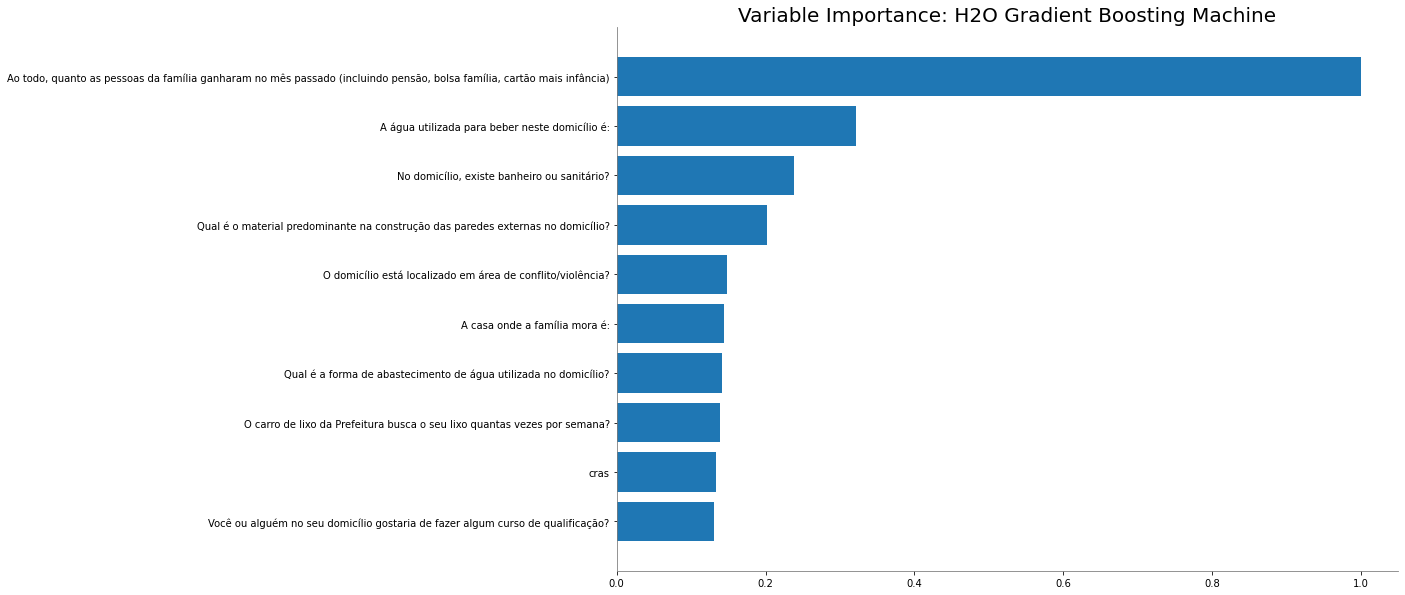

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# Test for balance classes

## sample factors : [2, 0.5] | max : .85

In [ ]:
response_col = 'ia level'

sample_factors = [2., 0.5]
max = .85

def apply_autoML_balance_for(training):
    aml = H2OAutoML(max_runtime_secs=0, balance_classes = True, class_sampling_factors = sample_factors, max_after_balance_size = max, seed=42, nfolds=10, exclude_algos = ["StackedEnsemble"])
    display(training)
    aml.train(y=response_col, training_frame=training)

    return aml

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for sanity_check_features

"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level
0,0,0.313531,1,0,0,0,0,1,1,1,1,1,1,1,1,1,nao grave
0,0,0.412541,1,0,0,0,0,0,0,1,1,1,0,1,0,1,nao grave
0,0,0.453795,0,0,0,1,0,0,1,0,1,0,0,0,1,1,nao grave
0,0,0.330033,1,0,0,1,0,0,0,1,1,0,0,0,0,1,grave
0,0,0.412541,1,0,0,1,0,0,1,1,1,1,1,0,1,1,grave
0,0,0.694719,1,1,0,0,0,1,1,0,0,1,0,0,0,1,nao grave
0,0,0.2467,1,0,0,1,1,0,1,1,1,1,0,0,0,1,nao grave
0,0,0.346535,0,1,0,0,1,1,1,1,1,1,0,0,0,1,nao grave
0,0,0.35066,0,0,0,1,0,0,0,0,1,1,0,0,0,1,grave
0,0,0.165017,1,1,0,1,1,0,1,1,1,1,0,0,0,1,nao grave


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%



### Best Model Updated: sanity_check_features-XGBoost_grid_1_AutoML_1_20220922_230418_model_8-acc:0.6802248677248677

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/sanity_check_features-XGBoost_grid_1_AutoML_1_20220922_230418_model_8-acc:0.6802248677248677

### sanity_check_features has accuracy: 0.6802248677248677

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20220922_230418_model_8


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.20154549150801443
RMSE: 0.4489381822790465
LogLoss: 0.5900213878445041
Mean Per-Class Error: 0.45857987336121464
AUC: 0.6772062463396556
AUCPR: 0.7965427726068247
Gini: 0.3544124926793113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4775105526049932
           grave    nao grave    Error    Rate
---------  -------  -----------  -------  ----------------
grave      947      7955         0.8936   (7955.0/8902.0)
nao grave  431      17878        0.0235   (431.0/18309.0)
Total      1378     25833        0.3082   (8386.0/27211.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.477511     0.810022  331
max f2                       0.291558     0.911563  395
max f0point5                 0.60692      0.756497  237
max accuracy                 0.535339     0.698725  295
max precision                0.868436     0.933333  4
max recall                   0.267612     1         399
max specificity              0.879474     0.999888  0
max absolute_mcc             0.60692      0.251476  237
max min_per_class_accuracy   0.680051     0.624611  169
max mean_per_class_accuracy  0.677666     0.626697  171
max tns                      0.879474     8901      0
max fns                      0.879474     18296     0
max fps                      0.267612     8902      399
max tps                      0.267612     18309     399
max tnr                      0.879474     0.999888  0
max fnr                      0.879474     0.99929   0
max fpr                      0.267612     1         399
max tpr                      0.267612     1         399

Gains/Lift Table: Avg response rate: 67.29 %, avg score: 67.26 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100327                   0.851275           1.361     1.361              0.915751         0.864285  0.915751                    0.864285            0.0136545       0.0136545                  36.0997   36.0997            0.0110708
2        0.0200287                   0.83549            1.31136   1.33622            0.882353         0.843137  0.899083                    0.853731            0.0131083       0.0267628                  31.1361   33.6225            0.0205844
3        0.0300246                   0.826149           1.35507   1.3425             0.911765         0.830392  0.903305                    0.845961            0.0135453       0.040308                   35.5073   34.25              0.0314336
4        0.0422991                   0.820739           1.27262   1.32222            0.856287         0.822477  0.889661                    0.839146            0.0156207       0.0559288                  27.2622   32.2222            0.0416623
5        0.0500165                   0.816217           1.29512   1.31804            0.871429         0.818267  0.886848                    0.835925            0.00999508      0.0659239                  29.5125   31.8041            0.0486244
6        0.10007                     0.79228            1.26251   1.29027            0.849486         0.802775  0.86816                     0.819344            0.063193        0.129117                   26.2514   29.0267            0.0887888
7       

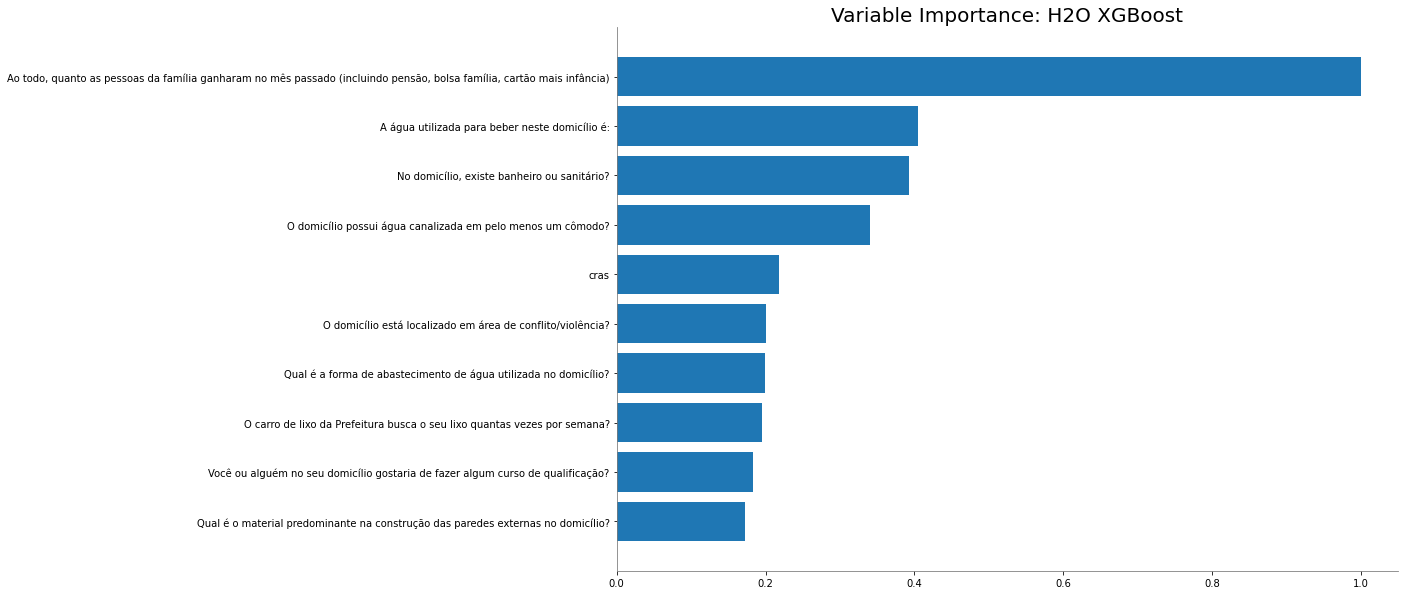

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_balance_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

## sample factors : [0.5, 2] | max : 0.85

In [ ]:
response_col = 'ia level'

sample_factors = [0.5, 2]
max = .85

def apply_autoML_balance_for(training):
    aml = H2OAutoML(max_runtime_secs=0, balance_classes = True, class_sampling_factors = sample_factors, max_after_balance_size = max, seed=42, nfolds=10, exclude_algos = ["StackedEnsemble"])
    display(training)
    aml.train(y=response_col, training_frame=training)

    return aml

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for sanity_check_features

"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level
0,0,0.231023,1,0,0,1,1,1,1,1,1,1,1,0,0,1,grave
0,0,0.330033,1,0,0,1,0,1,1,1,1,1,0,0,0,1,grave
0,0,0.49505,1,0,0,1,0,0,1,1,1,0,0,0,0,1,nao grave
0,0,1,1,0,0,1,0,0,1,1,1,1,1,0,0,1,nao grave
0,0,0.319307,1,0,0,1,0,0,1,0,1,0,0,0,0,1,grave
1,0.166667,0.412541,0,0,0,0,1,0,1,0,1,1,0,0,0,1,nao grave
0,0,0.536304,1,1,1,1,0,0,0,1,0,0,0,0,0,1,nao grave
1,0.166667,0.825083,1,1,0,1,0,0,1,1,1,1,0,0,0,0,nao grave
0,0,0.371287,0,1,0,1,1,0,1,1,1,1,0,0,0,1,nao grave
0,0,0.412541,0,0,0,0,0,0,0,0,1,0,0,0,0,1,grave


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%



### Best Model Updated: sanity_check_features-XGBoost_grid_1_AutoML_1_20220923_02457_model_15-acc:0.6812169312169312

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/sanity_check_features-XGBoost_grid_1_AutoML_1_20220923_02457_model_15-acc:0.6812169312169312

### sanity_check_features has accuracy: 0.6812169312169312

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20220923_02457_model_15


Model Summary: 
    number_of_trees
--  -----------------
    34

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.22601198669597178
RMSE: 0.4754071798952681
LogLoss: 0.6437314832205221
Mean Per-Class Error: 0.4609764704876136
AUC: 0.6843938565595266
AUCPR: 0.802947508597106
Gini: 0.3687877131190531

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31819021979967754
           grave    nao grave    Error    Rate
---------  -------  -----------  -------  ----------------
grave      916      7986         0.8971   (7986.0/8902.0)
nao grave  455      17854        0.0249   (455.0/18309.0)
Total      1371     25840        0.3102   (8441.0/27211.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.31819      0.808807  349
max f2                       0.219032     0.911582  393
max f0point5                 0.4526       0.758566  247
max accuracy                 0.392923     0.698284  296
max precision                0.792033     1         0
max recall                   0.188101     1         399
max specificity              0.792033     1         0
max absolute_mcc             0.46071      0.259877  240
max min_per_class_accuracy   0.50792      0.631602  196
max mean_per_class_accuracy  0.48807      0.632911  215
max tns                      0.792033     8902      0
max fns                      0.792033     18301     0
max fps                      0.188101     8902      399
max tps                      0.188101     18309     399
max tnr                      0.792033     1         0
max fnr                      0.792033     0.999563  0
max fpr                      0.188101     1         399
max tpr                      0.188101     1         399

Gains/Lift Table: Avg response rate: 67.29 %, avg score: 51.29 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104002                   0.742123           1.39168   1.39168            0.936396         0.759922  0.936396                    0.759922            0.0144738       0.0144738                  39.168    39.168             0.0124517
2        0.0200654                   0.724297           1.25452   1.32561            0.844106         0.73198   0.891941                    0.746463            0.0121252       0.0265989                  25.4519   32.5611            0.0199712
3        0.0300981                   0.715839           1.34467   1.33196            0.904762         0.7215    0.896215                    0.738142            0.0134906       0.0400896                  34.4665   33.1963            0.0305412
4        0.0402778                   0.701809           1.30915   1.3262             0.880866         0.708136  0.892336                    0.730558            0.0133268       0.0534164                  30.9152   32.6197            0.0401609
5        0.0500165                   0.691872           1.31235   1.3235             0.883019         0.696033  0.890522                    0.723836            0.0127806       0.066197                   31.2351   32.3501            0.0494591
6        0.100033                    0.655412           1.29839   1.31094            0.873622         0.670559  0.882072                    0.697197            0.0649407       0.131138                   29.8385   31.0943            0.0950784
7        

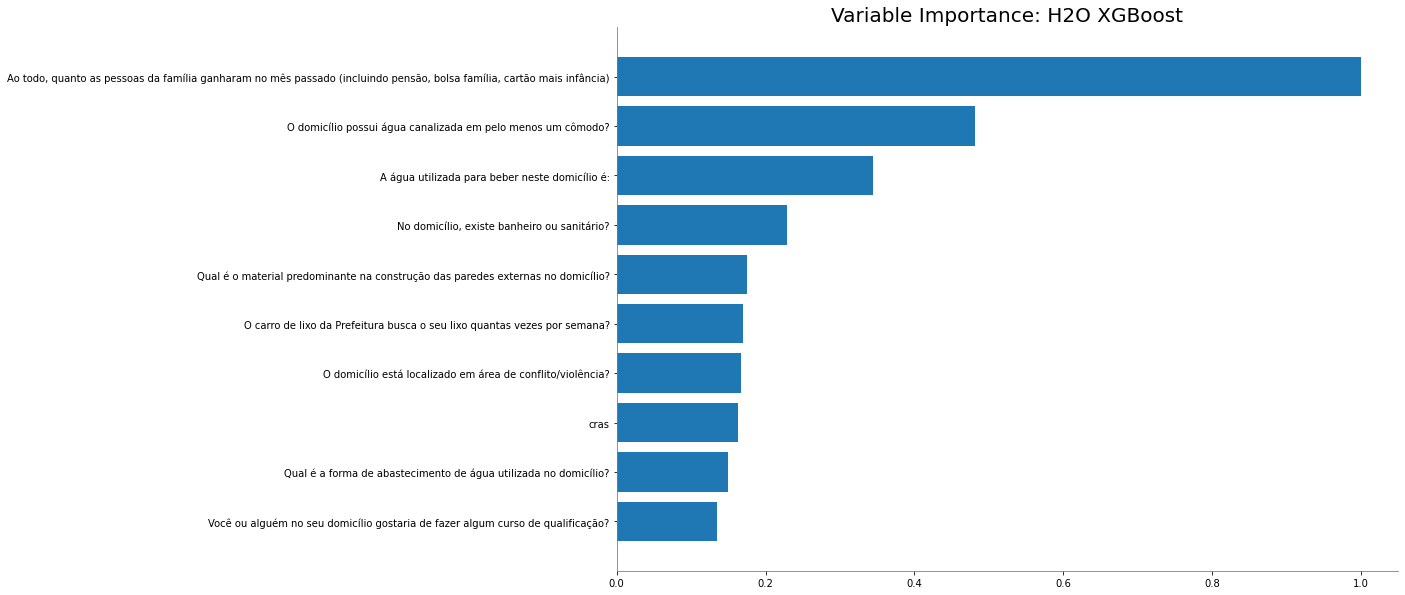

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_balance_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

## sample factors : [0.5, 2] | max : 3

In [ ]:
response_col = 'ia level'

sample_factors = [0.5, 2]
max = 3

def apply_autoML_balance_for(training):
    aml = H2OAutoML(max_runtime_secs=0, balance_classes = True, class_sampling_factors = sample_factors, max_after_balance_size = max, seed=42, nfolds=10, exclude_algos = ["StackedEnsemble"])
    display(training)
    aml.train(y=response_col, training_frame=training)

    return aml

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Summary for sanity_check_features

"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level
0,0,0.264851,1,0,0,0,1,0,1,0,1,1,0,0,0,1,grave
0,0,0.412541,0,0,0,1,0,0,1,1,1,1,0,0,0,1,grave
0,0,0.412541,0,0,0,1,0,1,1,0,1,0,1,0,0,1,nao grave
0,0,0.49505,0,1,0,1,0,1,1,1,1,1,1,0,1,1,nao grave
0,0,0.412541,1,0,0,1,0,1,1,1,1,1,0,0,0,1,nao grave
0,0,0.189769,1,1,0,0,0,1,1,1,1,1,0,0,0,1,nao grave
0,0,0.44637,1,0,0,1,0,0,0,0,1,0,0,0,0,1,nao grave
0,0,0.577558,1,1,0,1,0,1,1,1,1,1,1,0,1,1,nao grave
0,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,1,nao grave
0,0,0.330033,1,1,0,0,0,1,1,1,1,1,0,0,0,1,nao grave


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%



### Best Model Updated: sanity_check_features-XGBoost_grid_1_AutoML_1_20220923_200853_model_7-acc:0.6749338624338624

### Best Model Saved To: /content/drive/.shortcut-targets-by-id/1v1b2co-vHiLeABDuI7Kl7ht6eRqepmUD/Repasse Gui/models_H2O/sanity_check_features-XGBoost_grid_1_AutoML_1_20220923_200853_model_7-acc:0.6749338624338624

### sanity_check_features has accuracy: 0.6749338624338624

### Details of the best model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20220923_200853_model_7


Model Summary: 
    number_of_trees
--  -----------------
    33

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.19910581682488745
RMSE: 0.44621274838902514
LogLoss: 0.5843069994944596
Mean Per-Class Error: 0.4565836156048004
AUC: 0.6909962319751723
AUCPR: 0.8067240507629378
Gini: 0.3819924639503447

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4733519059419632
           grave    nao grave    Error    Rate
---------  -------  -----------  -------  ----------------
grave      984      7918         0.8895   (7918.0/8902.0)
nao grave  434      17875        0.0237   (434.0/18309.0)
Total      1418     25793        0.3069   (8352.0/27211.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.473352     0.810621  331
max f2                       0.268509     0.911631  394
max f0point5                 0.605287     0.762511  238
max accuracy                 0.555506     0.704017  277
max precision                0.879239     0.964912  2
max recall                   0.252289     1         397
max specificity              0.883502     0.999888  0
max absolute_mcc             0.605287     0.273809  238
max min_per_class_accuracy   0.676973     0.632421  171
max mean_per_class_accuracy  0.668558     0.636072  180
max tns                      0.883502     8901      0
max fns                      0.883502     18295     0
max fps                      0.239038     8902      399
max tps                      0.252289     18309     397
max tnr                      0.883502     0.999888  0
max fnr                      0.883502     0.999235  0
max fpr                      0.239038     1         399
max tpr                      0.252289     1         397

Gains/Lift Table: Avg response rate: 67.29 %, avg score: 67.27 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100327                   0.857478           1.34467   1.34467            0.904762         0.868885  0.904762                    0.868885            0.0134906       0.0134906                  34.4665   34.4665            0.0105699
2        0.0200654                   0.843513           1.361     1.35283            0.915751         0.850116  0.910256                    0.859501            0.0136545       0.0271451                  36.0997   35.2831            0.0216407
3        0.0300246                   0.832871           1.29426   1.3334             0.870849         0.837861  0.897185                    0.852323            0.0128898       0.040035                   29.4263   33.3404            0.0305989
4        0.0400206                   0.827448           1.34961   1.33745            0.908088         0.829864  0.899908                    0.846713            0.0134906       0.0535256                  34.9609   33.7452            0.0412811
5        0.0500165                   0.822556           1.36054   1.34207            0.915441         0.825486  0.903012                    0.842471            0.0135999       0.0671255                  36.0537   34.2065            0.0522973
6        0.10007                     0.797713           1.27452   1.30828            0.857562         0.808929  0.880279                    0.825694            0.0637938       0.130919                   27.4517   30.8279            0.0942982
7       

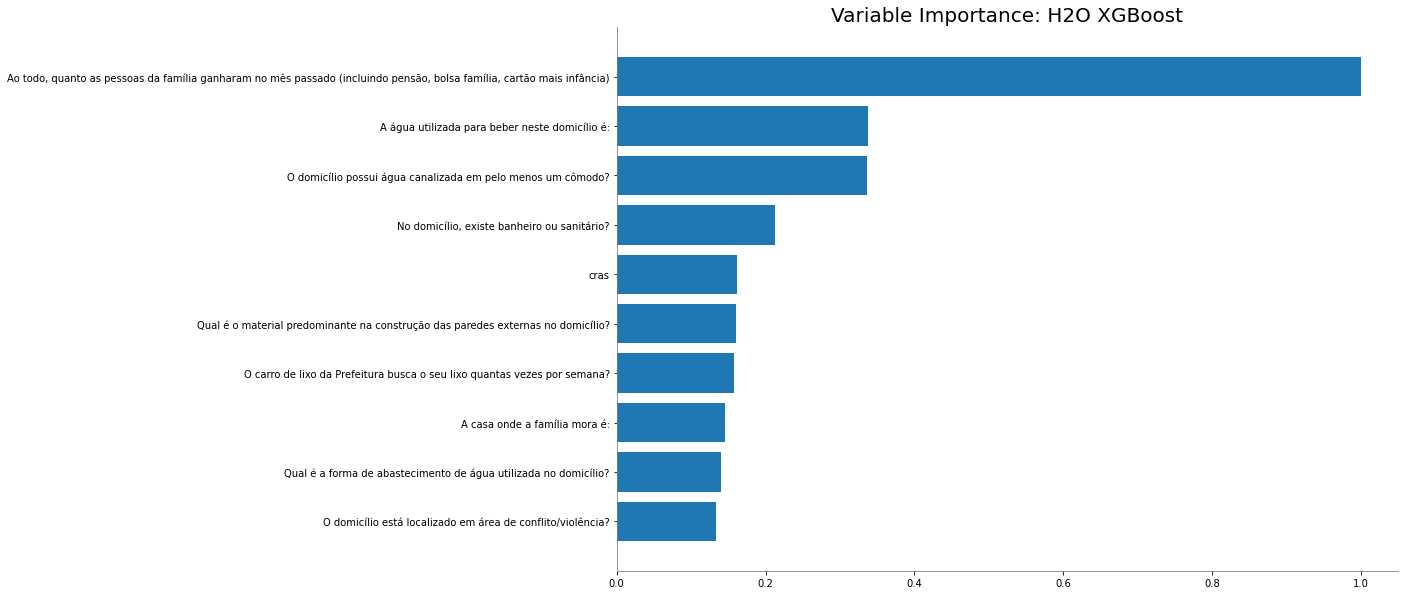

<Figure size 432x288 with 0 Axes>

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_balance_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

### sample factors : [0.5, 2] | max : 3

In [ ]:
response_col = 'ia level'

sample_factors = [2, 0.5]
max = 3

def apply_autoML_balance_for(training):
    aml = H2OAutoML(max_runtime_secs=0, balance_classes = True, class_sampling_factors = sample_factors, max_after_balance_size = max, seed=42, nfolds=10, exclude_algos = ["StackedEnsemble"])
    display(training)
    aml.train(y=response_col, training_frame=training)

    return aml

In [ ]:
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

for feature_set in feature_combinations:
    df_tmp = feature_combinations[feature_set]
    train, test = train_test_split(df_tmp.as_data_frame(), test_size=0.1, stratify=df_tmp.as_data_frame()["ia level"])

    train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test)

    display(Markdown(f"# Summary for {feature_set}"))
    
    auto_ml = apply_autoML_balance_for(train)
    accuracy = get_accuracy(auto_ml.leader, test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = auto_ml.leader
        best_feature_set = df_tmp
        best_model_name = f"{feature_set}-{best_model.key}-acc:{accuracy}"

        print()
        display(Markdown(f"### Best Model Updated: {best_model_name}"))
        print()

        saved_to = h2o.save_model(model=best_model, path=path_models, force=True, filename=best_model_name)
        
        print()
        display(Markdown(f"### Best Model Saved To: {saved_to}"))
        print()
        
        print()
        display(Markdown(f"### {feature_set} has accuracy: {accuracy}"))
        print()
        
        display(Markdown(f"### Details of the best model"))
        display(auto_ml.leader)
    try:
        auto_ml.leader.varimp_plot()
    except Exception as e:
        print(e)

# recall

In [ ]:
print('Porcentagem\n', df['ia level'].value_counts(normalize=True)*100)
print('\nContagem\n', df['ia level'].value_counts())

Porcentagem
 nao grave    67.286258
grave        32.713742
Name: ia level, dtype: float64

Contagem
 nao grave    20344
grave         9891
Name: ia level, dtype: int64


In [ ]:
def recall(tp, fn):
    return tp/(tp+fn)

In [ ]:
# PARA 2 CLASSES  - All Features

#grave tp = 155 | 8747
#nao grave = 18246 | 63 

print('recall para grave:', recall(155, 8747), '\nrecall para não grave:', recall(18246, 63))

recall para grave: 0.017411817569085598 
recall para não grave: 0.9965590693101753


In [ ]:
# PARA 4 CLASSES - All Features

#grave = 2590 | 6288
#leve = 0 | 1734 
#moderada = 11659 | 2607
#sem ia = 61 | 2153

print('recall para grave:', recall(2590, 6288), '\nrecall para leve:', recall(0, 1734), '\nrecall para moderada:', recall(11659, 2607), '\nrecall para sem ia:', recall(61, 2153))

recall para grave: 0.291732372155891 
recall para leve: 0.0 
recall para moderada: 0.8172578157857844 
recall para sem ia: 0.027551942186088526


In [ ]:
# PARA 4 CLASSES - Best Models

#grave = 2192 | 6686
#leve = 9 | 1725     
#moderada = 11928 | 2338
#sem ia = 72 | 2142

print('recall para grave:', recall(2192, 6686), '\nrecall para leve:', recall(9, 1725), '\nrecall para moderada:', recall(11928, 2338), '\nrecall para sem ia:', recall(72, 2142))

recall para grave: 0.2469024555079973 
recall para leve: 0.005190311418685121 
recall para moderada: 0.8361138370951914 
recall para sem ia: 0.032520325203252036


In [ ]:
# PARA 2 CLASSES - Best Models

#grave = 175 | 8727
#sem ia = 110 | 18199

print('recall para grave:', recall(175, 8727), '\nrecall para não grave:', recall(110, 18199))

recall para grave: 0.019658503707032128 
recall para não grave: 0.0060079742203288005


class_sampling_factors: grave = 1, nao grave = 0.5

Undersampling p/ moderada e bater ela com grave, pegar as minoritarias e fazer o oversampling